# Student Details
* Guy Kabiri


# Summarization

## PyTorch Dataloders
A big effort in machine learning is focusing on preparing the data.  
In order to make this part easier, `PyTorch` provided an API to load and handling the data before using it with our algorithms.  
`PyTorch`'s `Dataset` class provides a unified way to represent a dataset. All that needs to be done is to create a class that inherits from `Dataset` and overrides the `__len__` method that returns the size of the dataset, and the `__getitem__` method that returns a specific item from the dataset by an index.  
By self-implementing `__getitem__`, we may perform some transformations on the data before returning it back. This might be useful for example when handling a dataset that contains some ununiform size of images.

## Albumentations' Image Augmentation for Classification
`Albumations`' image augmentation for classification provides a way to define an augmentation pipeline in which the data will pass through.  
This process is done by calling to `Compose` class of `Albumentations`, which gets all the transform functions to load into the pipeline, and returns a callable object, that by calling it, will return an augmented image. Each transform function provided to the pipeline has a probability attribute to determine if the current image should be processed by that transform or not. In that way, we can create a bunch of different augmented images and increase our dataset's size.

# Imports

In [ ]:
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
import cv2
import albumentations as A

## Import the Data

In [ ]:
!wget -O MNIST.tar.gz https://activeeon-public.s3.eu-west-2.amazonaws.com/datasets/MNIST.new.tar.gz
!tar -zxvf MNIST.tar.gz

--2021-04-02 12:43:49--  https://activeeon-public.s3.eu-west-2.amazonaws.com/datasets/MNIST.new.tar.gz
Resolving activeeon-public.s3.eu-west-2.amazonaws.com (activeeon-public.s3.eu-west-2.amazonaws.com)... 52.95.149.78
Connecting to activeeon-public.s3.eu-west-2.amazonaws.com (activeeon-public.s3.eu-west-2.amazonaws.com)|52.95.149.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34812527 (33M) [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz        100%[===================>]  33.20M  14.4MB/s    in 2.3s    

2021-04-02 12:43:52 (14.4 MB/s) - ‘MNIST.tar.gz’ saved [34812527/34812527]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/processed/
MNIST/processed/test.pt
MNIST/processed/training.pt


In [ ]:
trainset = torchvision.datasets.MNIST(root='', train=False, download=False)

# Dataloader Class

In [ ]:
class MNISTDataset(Dataset):
    def __init__(self, train_set, transforms=None):
        super(MNISTDataset, self).__init__()
        self.x_train = train_set.data.detach().cpu().numpy()
        self.y_train = train_set.targets
        self.transforms = transforms

    def __getitem__(self, idx):
        img = self.x_train[idx]
        lbl = self.y_train[idx]
        if self.transforms is not None:
            img = self.transforms(image=img)['image']
        return img, lbl

    def __len__(self):
        return len(self.x_train)

# Defining the Augmentations

In [ ]:
# ID = 312252224 -> 0.4, 0.2, 0.2
transform = A.Compose([
                       A.Flip(      p=0.4),
                       A.Rotate(    p=0.2),
                       A.Blur(      p=0.2),
])

# Load the Data

In [ ]:
my_loader = MNISTDataset(trainset, transform)

# Display Samples

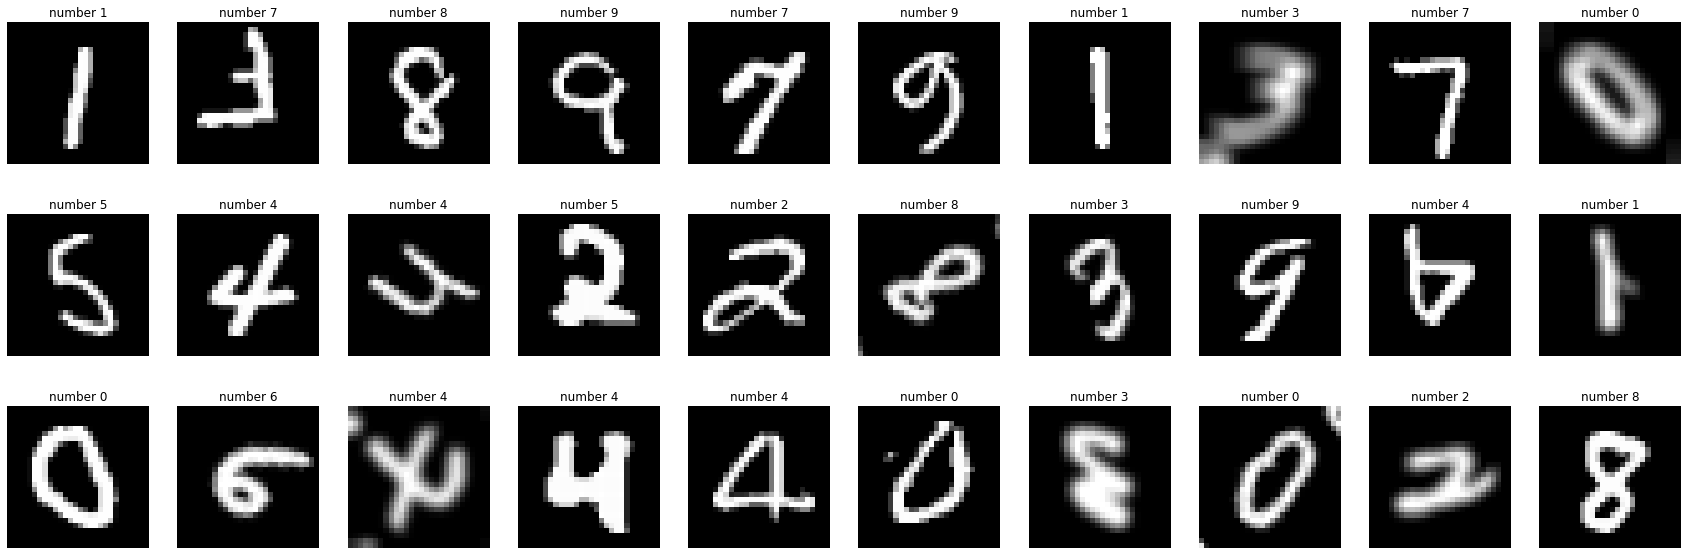

In [ ]:
plt.figure(figsize=(30, 10))

for index in range(30):
    plt.subplot(3, 10, index + 1)
    idx = random.randint(0, len(my_loader))
    img, lbl = my_loader[idx]
    plt.title('number {}'.format(lbl))
    plt.axis("off")
    plt.imshow(img, cmap='gray')
plt.show()